# **Interpretation of OLS Estimators**

In [1]:
install.packages(c("ggplot2", "dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#loading California housing data
file = "/content/SaratogaHouses.csv"
hData = read.csv(file, header = TRUE, stringsAsFactors = TRUE)
str(hData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

Suppose that we consider price as the respinse and livingArea and age as the predictors.

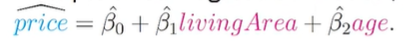

Here,

B0hat is the predicted price when both predictors livingArea and age are equal to 0.

B1hat is the change in the predicted price for a 1 unit increase in livingArea while keeping the remaining predictor age fixed.

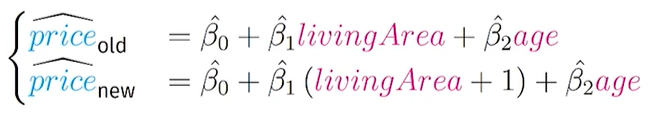

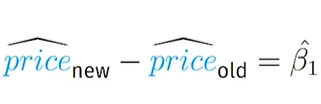

There, B1 hat is the change in the predicted price for a 1 unit increase in the living area.

In [4]:
# Building a linear regression model for price as a function of continuous predictors livingArea and age
model = lm(data = hData, price ~ livingArea + age)
summary(model)


Call:
lm(formula = price ~ livingArea + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-267300  -40485   -8491   27303  557613 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22951.791   5536.960   4.145 3.56e-05 ***
livingArea    111.277      2.713  41.019  < 2e-16 ***
age          -224.751     57.576  -3.904 9.84e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68820 on 1725 degrees of freedom
Multiple R-squared:  0.5118,	Adjusted R-squared:  0.5112 
F-statistic: 904.2 on 2 and 1725 DF,  p-value: < 2.2e-16


In [5]:
coef(model)

(Intercept)  livingArea         age 
 22951.7915    111.2774   -224.7505

#### In order to interpret the coefficient estimates that we get from the multiple linear regression model, we have to look at that particular feature and increase it by 1 unit while keeping all the features fixed and look at the corresponding change on the response variable which will be precisely be equal to the coefficient efstimates.

- If we increase livingArea by 1 unit while keeping the age of the house fixed the correspomning change in the price of the house is exactly $111.277.

- For B2hat: if we fix livingArea and increase age by 1 unit, in case is by 1 year, the corresponding change in the predicted price is exactly -224.751.

(The new house price will be $224.751 less than old house price.)

-------

### Here we saw for the continuous variables. Now let's see what happens when the variables are mixed (both continuous and categorical).

Now, let's consider preice as the response variable and livingArea and heating as the predictors.

In [6]:
levels(hData$heating)

[1] "electric"        "hot air"         "hot water/steam"

There is also an dummy encoding that R will do when we use a categorical predictor as a part of the input for the lm().

In [7]:
# checking the dummy encoding of categorical predictor heating
contrasts(hData$heating)

,hot air,hot water/steam
electric,0,0
hot air,1,0
hot water/steam,0,1


In [8]:
# Build a linear regression model for price as a function of continuous predictor livingArea and categorical predictor heating
model = lm(data = hData, price ~ livingArea + heating)
summary(model)


Call:
lm(formula = price ~ livingArea + heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-281128  -39237   -8028   27841  544832 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6004.147   5512.378   1.089 0.276213    
livingArea               111.167      2.759  40.288  < 2e-16 ***
heatinghot air         17453.410   4579.376   3.811 0.000143 ***
heatinghot water/steam -2609.893   5702.118  -0.458 0.647221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68570 on 1724 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5148 
F-statistic: 611.9 on 3 and 1724 DF,  p-value: < 2.2e-16


With the usual intercept and livingArea, we can also see two new variables. This is where the dummy encoding came into picture.

There is no heatingelectric as electric is our reference level as we saw earlier.

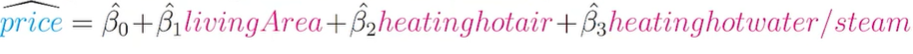

Here, `B0hat` and `B1hat` has the same interpretation as above.

`B2hat` is the differnece between the predicted price of a hot air heated house and the predicted price of an electric-heated house (reference level) with the same living area.

- If a house has electric heating then these two dummy variables will be 0.

- If a house has hot air heating than the dummy vaiable heatinghotair will be equal to 1 and the heatinghotwater/steam will be 0 and vice versa.
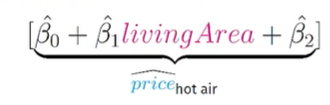

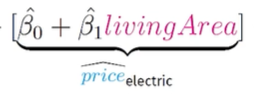

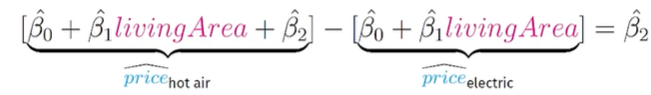

### **Extracting the coefficient estimates**

In [9]:
# Extracting the coefficient estimates
beta0hat = summary(model)$coefficients['(Intercept)', 'Estimate'] #name of row and colum from summary table
beta1hat = summary(model)$coefficients['livingArea', 'Estimate'] #name of row and colum from summary table
beta2hat = summary(model)$coefficients['heatinghot air', 'Estimate'] #name of row and colum from summary table
beta3hat = summary(model)$coefficients['heatinghot water/steam', 'Estimate'] #name of row and colum from summary table

In [10]:
# Finding livingArea that are common to electric and hot air heated houses
intersect(hData[hData$heating == 'electric', 'livingArea'],hData[hData$heating == 'hot air', 'livingArea'])

[1]  906 1632 1056 1600 1008 1560 1676 1656 2300 1232 1368 1480 1348 1343 1392
[16] 1144  912 1508 1492 1561  936 1240 1638  672 1184 1385 1320 1527 1680 1176
[31] 1344 1585 1479 1237 1228 1375  924 2080 2488 1080 1488 1552 1400  880 2340
[46] 1040 1326 1852  960 1290 1816 2600 1475 1336 1684 1219 1548  988 1592  908
[61] 1910 1900 1314  945 1872 1352 2102 1140  768 2212 1248 1920 1281 1512 1391
[76]  920 1514 1360 1404 1274 1608 1554 2380 1792 1302 2828 1152 1558 1300 1652
[91] 1200

In [11]:
# Finding which houses have livingArea equal to 1200
# which() tells us what rows for what rows this condition is true
which(hData$livingArea == 1200)

[1]  640  766 1010 1665 1676

In [12]:
# Getting details of those houses
hData[which(hData$livingArea == 1200), c('price', 'livingArea', 'heating')]

,price,livingArea,heating
,<int>,<int>,<fct>
640,158000,1200,hot air
766,128900,1200,hot air
1010,95000,1200,hot air
1665,172000,1200,electric
1676,213000,1200,electric


Here, we can see that the house in row position 640 is hot air heated and house at row position 1665 is electric heated, both having same living area i.e., 1200.

In [13]:
# Calculating the difference between predicted house price of a hot air heated house and an electric heated house with the same livingArea of 1200
yhat = predict(model)
yhat[[640]]-yhat[[1665]]

[1] 17453.41

In [14]:
# Comparing with beta2hat
beta2hat

[1] 17453.41

So, we can see the difference between hot air heated house and electric heated house is equal to `beta2hat`.

As such, our `beta3hat` will be the difference between the predicted house price for the hot water/steam heated house and an electric heated house for the same living area.

-------
# Accuracy of the coefficient Estimates

How do we access the accuracy of the coefficient estimates?

How can we be so sure that the living area couldn't have been any bigger or smaller had we used the different dataset?

How much is the variability in the estimate?

If we use a different dataset, we will get different living area each time. If we have 1000 different dataset, we will possibly get 1000 differnt living area. The standard error we see is what sould be the standard deviation of those 1000 different values of the coefficient estimate beta1hat. This is one of the main way to access the accuracy of the coefficient estimates.


It can be shown that the OLS coefficeient estimates for an MLRM are unbiased:

`E[Bhat - B] = 0`

Where,
- B = population parameters
- Bhat = estimator

(Here, the unbisased nature of the Bhat is that, if we were to average out the realization of Bhat coming from many different datasets than that average will get closer and closer to the True population Beta value.)

Now, lets talk about the variablility in OLS estimates. Here, we will see how can we calculate the variability.
So, the variablity is captured by whats known as the 'covariance matrix'.We can think of Bhat as a random vector because there are n+1 coeffcients that we want to estimate.

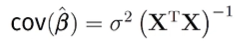

Here, the covariavnce of Bhat turnsout to be dependet on the inverse of transpose(X)*X.
- `X` is a design matrix
- `σ²` is the assumption we made about the random error term where we assumed that the random error term for the n samples have mean 0 and constant variance equal to σ² which we don't know what it is.

This way we calculate the cavariance of the estmated Bhat which is a vector of estimators.

Then, how do we calculate what sigma squared is?

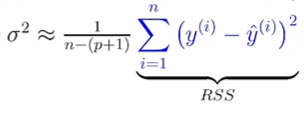

It simply is, how much is the RSS on an average.

The standard deviations of the OLS coefficeints are also called `standard errors (SE)` which can be used to calculate confidence intervals (CI) for population coefficient parameters `Betaj`.

In [15]:
summary(model)


Call:
lm(formula = price ~ livingArea + heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-281128  -39237   -8028   27841  544832 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6004.147   5512.378   1.089 0.276213    
livingArea               111.167      2.759  40.288  < 2e-16 ***
heatinghot air         17453.410   4579.376   3.811 0.000143 ***
heatinghot water/steam -2609.893   5702.118  -0.458 0.647221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68570 on 1724 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5148 
F-statistic: 611.9 on 3 and 1724 DF,  p-value: < 2.2e-16


Here, we have an estimate of Beta1hat which is 111.167. How can we determine how close is this estimate is to the true value of Beta1? So, we ask same question ina different way i.e.,how much confidence we require to be 95% confident? Here, we are looking for an interval where we can be 95% confident that the true Beta1 lies between that interval.

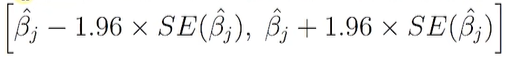

If j = 1, we have:
- B1hat = estimate
- SE(B1hat) = Standard error of B1hat

Let's see:

SE = 5512.378

In [16]:
SE = summary(model)$coefficients['livingArea', 'Std. Error']
SE

[1] 2.759349

In [17]:
beta1hat

[1] 111.1675

Let's calculate the CI:

In [18]:
# left end of the CI
beta1hat - 1.96 * SE

[1] 105.7591

In [19]:
# right end of the CI
beta1hat + 1.96 * SE

[1] 116.5758

We can say that, we are 95% confident that the true value of Beta1 is somewhere in between 106 and 117 approximately.

So, how do we interprete this for practicle utility?
We can say that if we were to increase the livingArea by 1 unit while keeping the heating variable constant, the resulting change in the predicted house price will be anywhere between $1061 and $117 with 95% confidence.

-----

# **Hypothesis Tests**

In context of SLRM, to check if there is a relationship between the `response and a particular predictor, standard errors` can be use to perform `hypothesis tests` on the `population coefficient parameters`.

`H0: Living area has no relationship with house price.(Beta1 = 0)`

`H1: Living area has a relationship with house price.`

From our lm() we can see that our B1hat value is 111 which is far from 0. So, can we say that the null hypothesis is actually false?

Checking this is known as Hypothesis testing.

## Estimating a p-value
We observed that B1hat to be 111.16 and according to our null hypothesis B1 is 0. We can see that our B1hat is far away from 0.

Now, we are going to calculate the probability that we can observe that something is far away from 0 assuming that the null hypothesis is True. This probability is known as the p-value.
- If the probability is very small compared to the threshold (typically 0.5) then we reject the null hypothesis.

It is an extremely rare event and we assumed that out H0 is True.


In [20]:
summary(model)


Call:
lm(formula = price ~ livingArea + heating, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-281128  -39237   -8028   27841  544832 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6004.147   5512.378   1.089 0.276213    
livingArea               111.167      2.759  40.288  < 2e-16 ***
heatinghot air         17453.410   4579.376   3.811 0.000143 ***
heatinghot water/steam -2609.893   5702.118  -0.458 0.647221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68570 on 1724 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5148 
F-statistic: 611.9 on 3 and 1724 DF,  p-value: < 2.2e-16


We observed a B1hat value as 111 which is far away from 0 assuming that the true value of B1 is 0. What is the probability of observing B1hat value as 111? This turns out to be a small number, which is very rare or typically not possible so we reject the null hypothesis and conclude that B1 is not equal to 0.

Meaning, there is a connection between living area and the house price.

----

Here, p-value is specific to every feature.
3.PNG

As we can see that the coefficient estimate is negative and the standard error is almost twice of the magnitude of the coefficient estimate.

If we check the p-value which is 0.64722 meaning that if we observe the coefficient estimate for heatinghot water/steam, assuming that our H0:B3 = 0, the coefficient estimate -2609/893 is likely to be observed is 64.7%. This is a resonable amount of chance so we cannot reject the null hypothesis.

Therefore, p-value is specific to every feature. If the p-value is smaller then we reject the H0 and conclude that the jth predictor contributes to the linear model.
We have to look at every feature and try to observe wether the feature has a strong impact on predicting the response variable.

What is a F-test?
When the number of predictors is large, some of the predictor's p-values could actually go below the threshold by chance while there is actually no connection between them and the response variable. In this case, we take the help of the F-test in which the `null hypothesis H0 is that all population coefficients are zeros except the intercept.`

`H0: B1 = B2 = .... = Bn = 0 (none of them have connection to response variable)`
- If F-statistic is far away from 1

`H1: At least one population coefficient is not equal to zero.(at least one have connection to response variable)`
- If F-statistic is close to 1



In [21]:
# Build a linear model for predicting house price based on livingArea, landValue, bedrooms, rooms, heating and age
model = lm(data = hData, price ~ livingArea + landValue + bedrooms + rooms + heating + age)
summary(model)


Call:
lm(formula = price ~ livingArea + landValue + bedrooms + rooms + 
    heating + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-249242  -37189   -5337   27414  459045 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.383e+04  6.365e+03   5.315 1.21e-07 ***
livingArea              8.749e+01  4.040e+00  21.658  < 2e-16 ***
landValue               9.382e-01  4.706e-02  19.937  < 2e-16 ***
bedrooms               -9.252e+03  2.663e+03  -3.474 0.000526 ***
rooms                   2.744e+03  1.007e+03   2.725 0.006496 ** 
heatinghot air          1.275e+04  4.140e+03   3.079 0.002106 ** 
heatinghot water/steam  3.392e+03  5.413e+03   0.627 0.530989    
age                    -2.448e+02  5.482e+01  -4.466 8.50e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61130 on 1720 degrees of freedom
Multiple R-squared:  0.6159,	Adjusted R-squared:  0.6143 
F-stati

Here, we can see that almost all the features are significant where p-values < 0.05 meaning these features contribute to the prediction of the response variable.

We can also see that the heatinghot water/steam has a fairly high p-value indicating that the feature is not contributing in the prediction of the price of the house.

In [22]:
# Removing heating feature
model = lm(data = hData, price ~ livingArea + landValue + bedrooms + rooms + age)
summary(model)


Call:
lm(formula = price ~ livingArea + landValue + bedrooms + rooms + 
    age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-246395  -36741   -5879   26544  463271 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.019e+04  6.127e+03   6.560 7.11e-11 ***
livingArea   8.838e+01  4.036e+00  21.900  < 2e-16 ***
landValue    9.544e-01  4.697e-02  20.322  < 2e-16 ***
bedrooms    -9.138e+03  2.639e+03  -3.462 0.000549 ***
rooms        2.805e+03  1.010e+03   2.777 0.005547 ** 
age         -2.592e+02  5.243e+01  -4.944 8.40e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61320 on 1722 degrees of freedom
Multiple R-squared:  0.6131,	Adjusted R-squared:  0.6119 
F-statistic: 545.7 on 5 and 1722 DF,  p-value: < 2.2e-16


Here, we can see that when we removed the heating feature, the p-values that we observed earlier has changed and intercepy has become significant (even smaller). Therefore, we can see that p-values depends on what predictors we use to build the model and what dataset we use.

Whaterver the case, the interpretation remains the same : if p-value is less than the threshold, than the predictor is useful in predicting the response variable.

---------
# **Accuracy of the Model:** R² and adjusted R² Statistic

## **R²**
R² statistic varies between 0 and 1 and is the measure of the proportion of variance that is inherent in the response variable explained using the linear regression model.

It is a measure of the variability in the response Y that the MLRM (built using the predictors X1,X2,...,Xp) is able to explain.

In [23]:
# with heating feature
model = lm(data = hData, price ~ livingArea + landValue + bedrooms + rooms + heating + age)
summary(model)


Call:
lm(formula = price ~ livingArea + landValue + bedrooms + rooms + 
    heating + age, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-249242  -37189   -5337   27414  459045 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.383e+04  6.365e+03   5.315 1.21e-07 ***
livingArea              8.749e+01  4.040e+00  21.658  < 2e-16 ***
landValue               9.382e-01  4.706e-02  19.937  < 2e-16 ***
bedrooms               -9.252e+03  2.663e+03  -3.474 0.000526 ***
rooms                   2.744e+03  1.007e+03   2.725 0.006496 ** 
heatinghot air          1.275e+04  4.140e+03   3.079 0.002106 ** 
heatinghot water/steam  3.392e+03  5.413e+03   0.627 0.530989    
age                    -2.448e+02  5.482e+01  -4.466 8.50e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61130 on 1720 degrees of freedom
Multiple R-squared:  0.6159,	Adjusted R-squared:  0.6143 
F-stati

In [24]:
# with heating feature
model = lm(data = hData, price ~ livingArea)
summary(model)


Call:
lm(formula = price ~ livingArea, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13439.394   4992.353   2.692  0.00717 ** 
livingArea    113.123      2.682  42.173  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.5075,	Adjusted R-squared:  0.5072 
F-statistic:  1779 on 1 and 1726 DF,  p-value: < 2.2e-16


In [25]:
model = lm(data = hData, price ~ livingArea + landValue)
summary(model)


Call:
lm(formula = price ~ livingArea + landValue, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-241001  -37073   -6177   27911  465444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.055e+04  4.499e+03   4.568 5.28e-06 ***
livingArea  9.021e+01  2.660e+00  33.916  < 2e-16 ***
landValue   9.577e-01  4.709e-02  20.339  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62080 on 1725 degrees of freedom
Multiple R-squared:  0.6028,	Adjusted R-squared:  0.6023 
F-statistic:  1309 on 2 and 1725 DF,  p-value: < 2.2e-16


We can observe that R² value will keep increasing as long as we keep adding more features.

These features may not be connected to the response variable as it is just modeling the noise which will eventually lead to over-fitting the model. So, increase in R² value cannot be good as it may be the result of over-fitting. For that purpose, we have a measure which is known as Adjucted R² statistic.

### **Adjucted R²**
Adjucted R² statistic penalizes the addition of new predictors. It is the proportion of variance in the response explained by the linear model built using only those predictors that actually affect the resposne variable, not all of them.

- If we consider all the predictors that its R² value.
- If we only consider the predictors that effect the response variable that it is adjusted R² value.

Dure to this reason, the adjusted R² value will actually start decreasing as we add enough predictors to explain the outcome of the response variable.

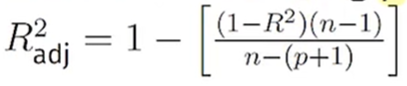

Adjucted R²  is where we will look at particularly when we have a large number of predictors we are using to buld a model.